### Times Distribution Analysis

In [5]:
from pyrox.core import PyroxClient
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style("whitegrid")

class Gender:
    MALE = "male"
    FEMALE = "female"

class Division:
    OPEN = "open"
    PRO = "pro"

## Retrieving our data

- Optionally defining a "faster than average" subset of athletes (this could be substituted further down in the calls to the plotting function)

In [6]:
client = PyroxClient()
gender2use = Gender.MALE
division2use = Division.OPEN
time_range = (58, 65)  # minutes
excel_data = client.get_race(season=7, location="london", year=2024, total_time=time_range, gender=gender2use, division=division2use)

mean_run_time = excel_data["run_time"].mean()
faster_than_avg = excel_data[excel_data["run_time"] < mean_run_time]
print(f"Number of athletes faster than average: {len(faster_than_avg)} - where average is {mean_run_time:.2f} minutes")

Number of athletes faster than average: 30 - where average is 30.57 minutes


In [ ]:
client.list_races(season=8)
london_excel = client.get_race(season=8, location="london-excel")
set(london_excel["division"])

True

### Defining the plotting function

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt


def plot_distributions_with_mean_and_median(df, *cols, bins=30, tick_step=0.2, title=None):
    """
    Plot distributions (histograms) of multiple columns in separate subplots,
    with vertical lines showing the mean and median of each column.

    """
    if not cols:
        raise ValueError("Please pass at least one column name.")

    n = len(cols)
    ncols = 2
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(nrows, ncols, figsize=(7 * ncols, 5 * nrows))
    axes = np.atleast_1d(axes).flatten()

    for ax, col in zip(axes, cols):
        series = df[col].dropna()
        if series.empty:
            ax.set_title(f"{col} (no data)")
            ax.axis("off")
            continue

        data = series.astype(float)

        mean_val = data.mean()
        median_val = data.median()

        # Histogram
        ax.hist(data, bins=bins)

        # Mean + median lines
        ax.axvline(
            mean_val,
            color="red",
            linestyle="--",
            linewidth=2,
            label=f"Mean = {mean_val:.2f}",
        )
        ax.axvline(
            median_val,
            color="green",
            linestyle=":",
            linewidth=2,
            label=f"Median = {median_val:.2f}",
        )

        ax.set_title(col)
        ax.set_xlabel("Time")
        ax.set_ylabel("Frequency")

        # X-ticks every 0.2
        xmin, xmax = ax.get_xlim()
        ticks = np.arange(
            math.floor(xmin / tick_step) * tick_step,
            math.ceil(xmax / tick_step) * tick_step + tick_step / 2,
            tick_step,
        )
        ax.set_xticks(ticks)

        for label in ax.get_xticklabels():
            label.set_rotation(45)

        ax.legend()

    for ax in axes[len(cols):]:
        ax.axis("off")

    if title:
        fig.suptitle(title, fontsize=12, y=0.98)

    plt.tight_layout()
    plt.show()


- Below plots are simply observing how the times are distributed (based on the requested data from above)

- In the below case, we are seeing the Run and Station times distirbutions of London, Men Open 2024 Excel race - where the athletes had a finish time in the 68-65 minutes time range.

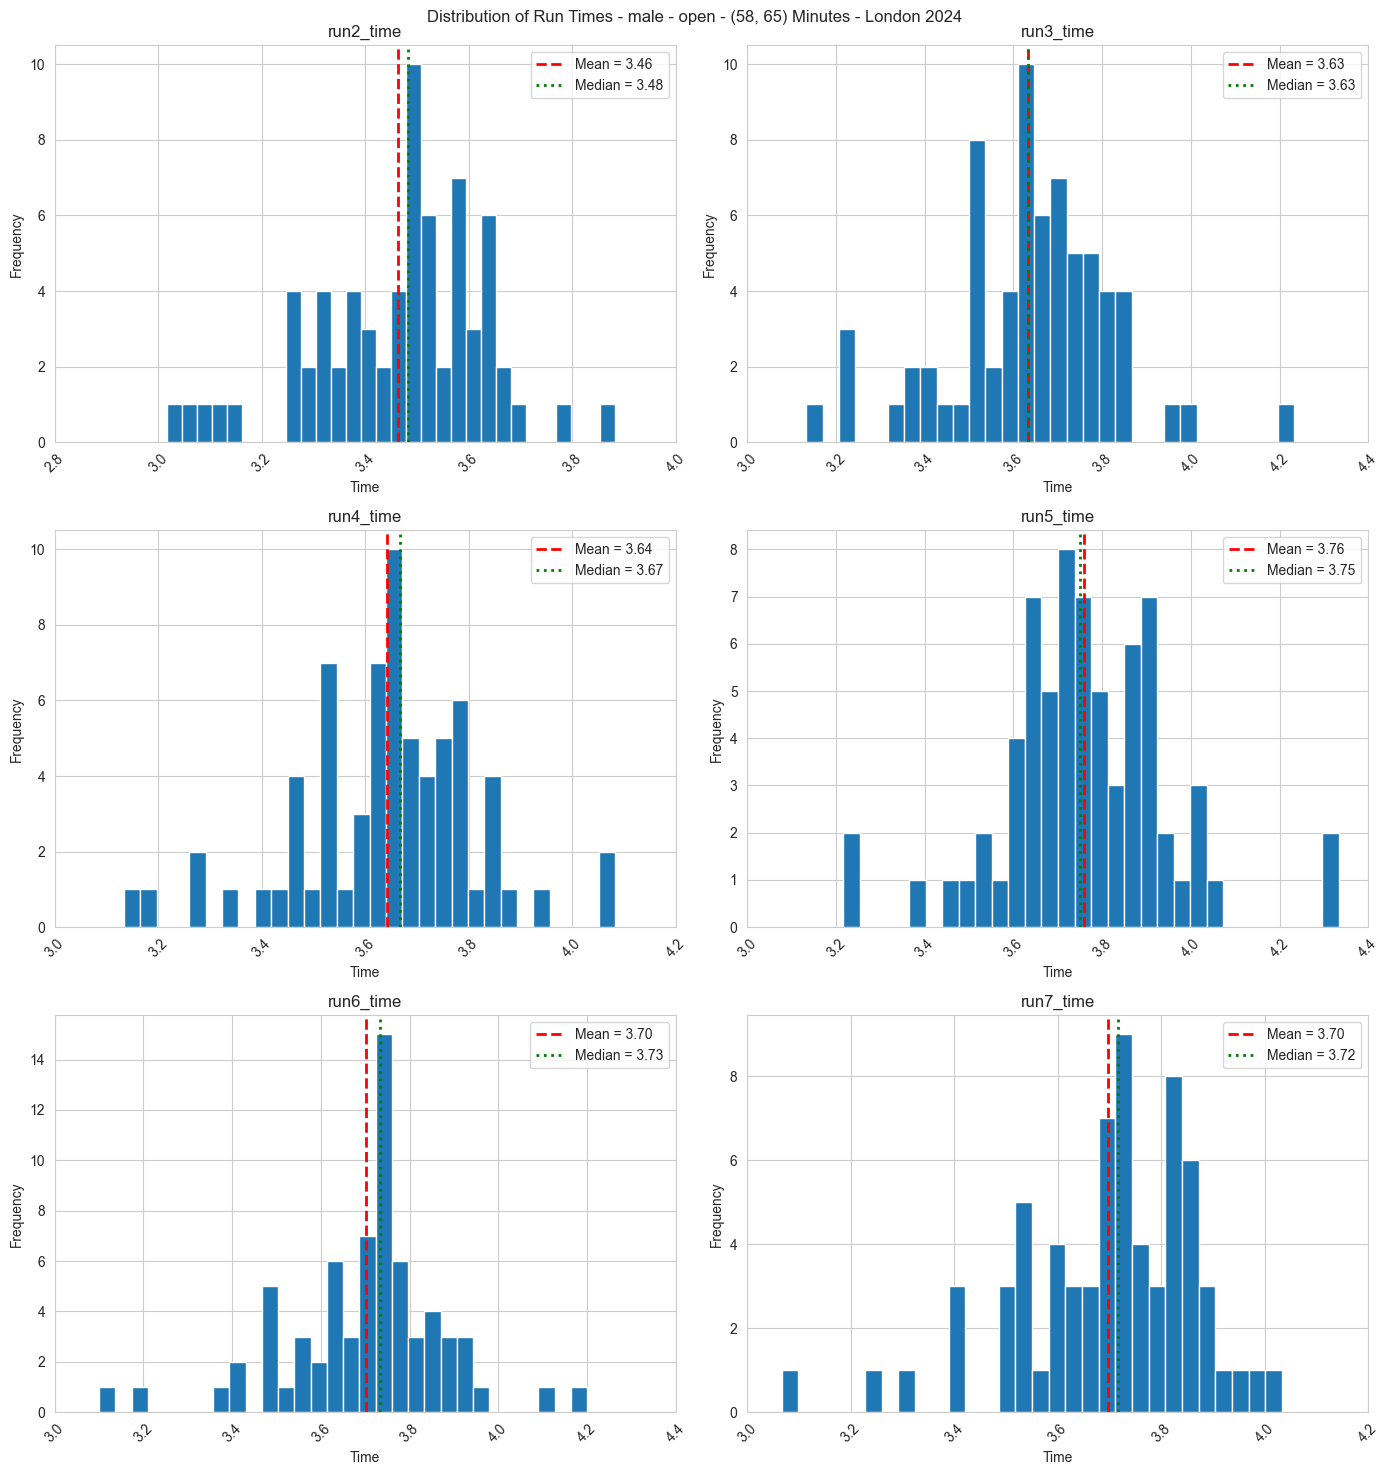

In [7]:
plot_distributions_with_mean_and_median(
    excel_data,
    "run2_time",
    "run3_time",
    "run4_time",
    "run5_time",
    "run6_time",
    "run7_time",
    title=f"Distribution of Run Times - {gender2use} - {division2use} - {str(time_range)} Minutes - London 2024"
)

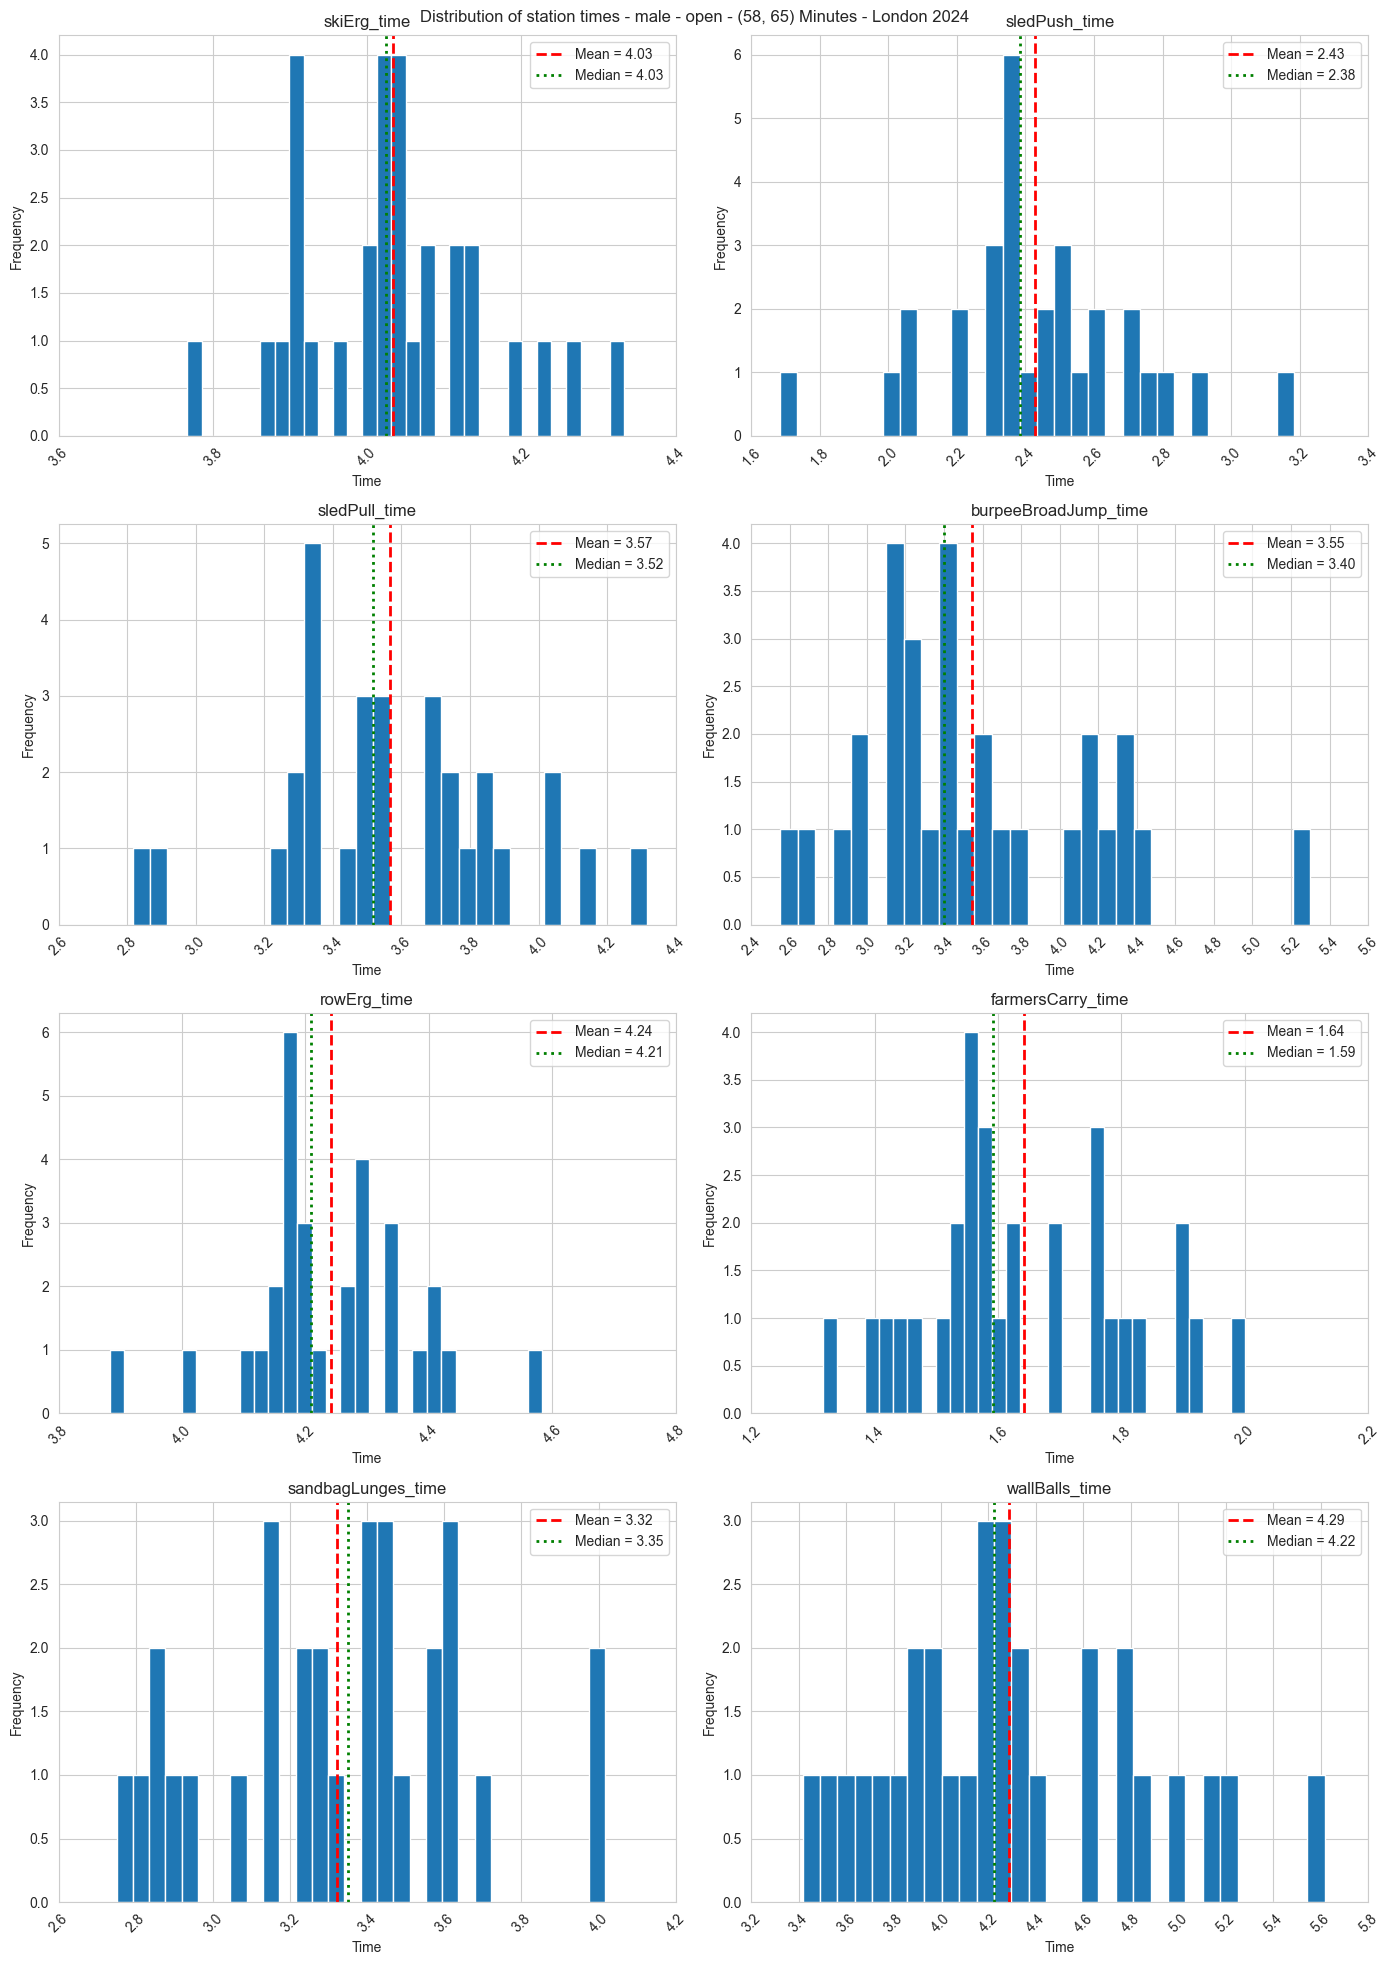

In [8]:
STATION_COLUMNS = ['skiErg_time', 'sledPush_time', 'sledPull_time', 'burpeeBroadJump_time', 'rowErg_time', 'farmersCarry_time', 'sandbagLunges_time', 'wallBalls_time']


plot_distributions_with_mean_and_median(
    faster_than_avg,
    *STATION_COLUMNS,
    title=f"Distribution of station times - {gender2use} - {division2use} - {time_range} Minutes - London 2024"
)

In [48]:
excel_data.loc[excel_data['run5_time'] > 6]

,age_group,division,event_id,event_name,gender,name,roxzone_time,run1_time,run2_time,run3_time,run4_time,run5_time,run6_time,run7_time,run8_time,run_time,total_time,skiErg_time,sledPush_time,sledPull_time,burpeeBroadJump_time,rowErg_time,farmersCarry_time,sandbagLunges_time,wallBalls_time,work_time
11,35-39,open,JGDMS4JI939,2024 London,female,"Mansell, Kim",6.233333,5.6,4.316667,4.666667,4.7,7.083333,4.8,4.633333,4.816667,40.55,80.25,4.833333,3.15,4.433333,5.233333,4.883333,2.033333,3.833333,5.133333,33.533333
